In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(rc={'figure.figsize': [30, 15]}, font_scale=1.3)

In [310]:
df = pd.read_csv("income_evaluation.csv")

In [311]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [312]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [314]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [315]:
#There is a space in the beggining of coloumns name
df.columns = df.columns.str.replace(' ', '') 

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [317]:
print('workclass',df.workclass.unique())
print('education',df.education.unique())
print('marital-status',df['marital-status'].unique())
print('occupation',df.occupation.unique())
print('relationship',df.relationship.unique())
print('race',df.race.unique())
print('gender',df.sex.unique())
print('native-country',df['native-country'].unique())
print('predclass',df.workclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
gender [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India

In [318]:
all_records = df.shape[0]
all_records

32561

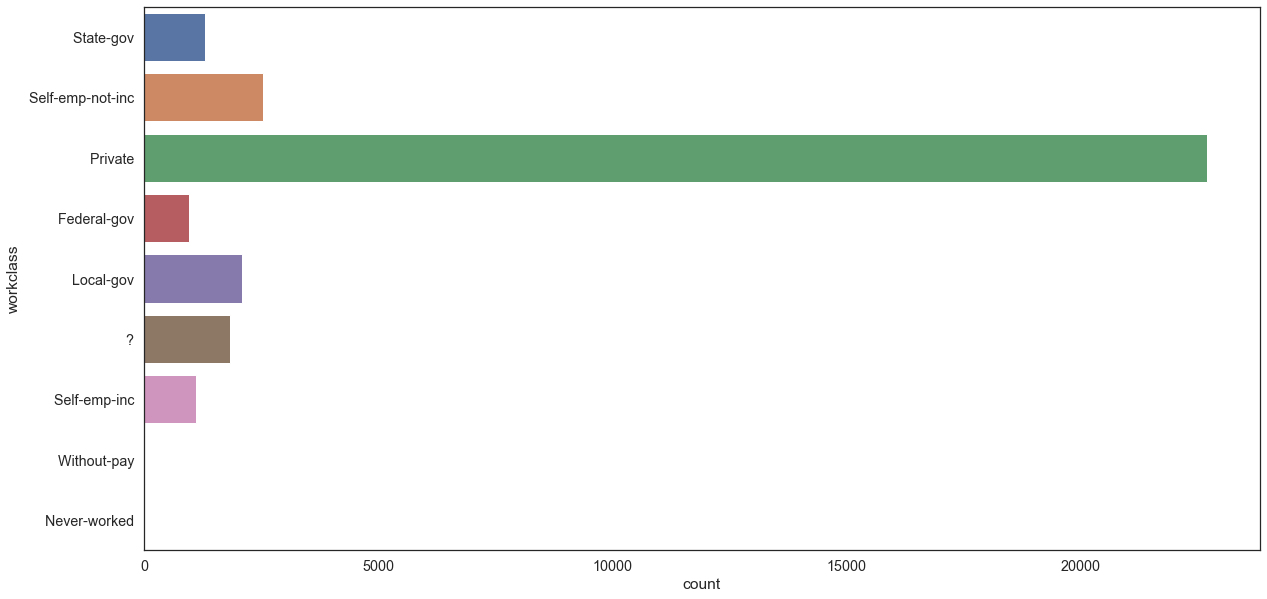

In [319]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
sns.countplot(y="workclass", data=df)
#data is somewhat skewed

In [320]:
print('education',df.education.unique())

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [321]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [322]:
df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


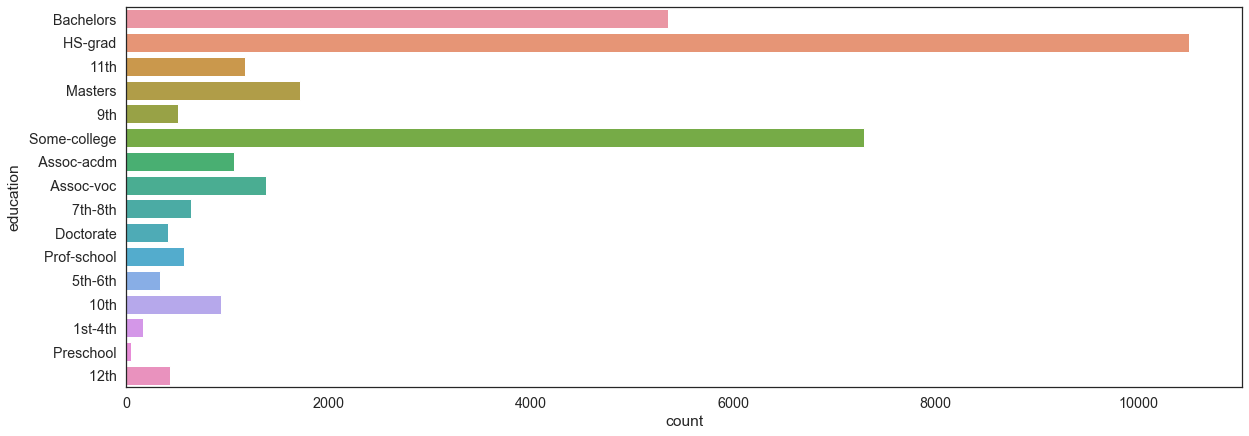

In [323]:
fig = plt.figure(figsize=(20,7))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df)

In [324]:
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

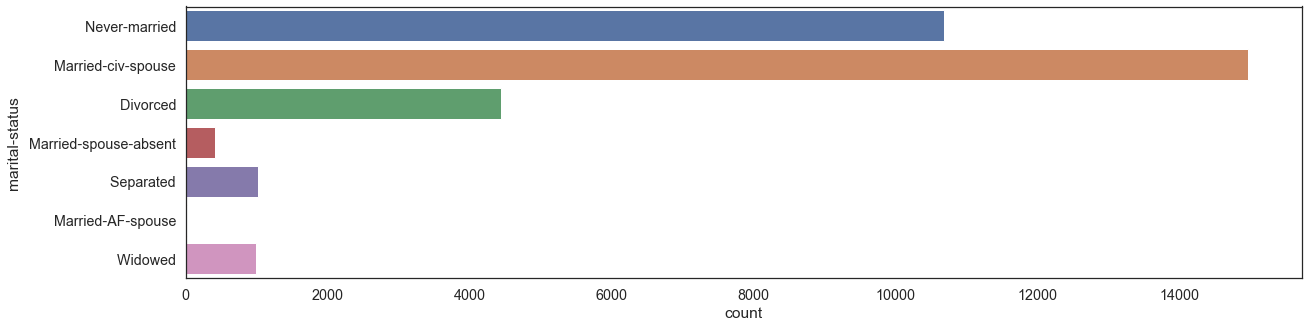

In [325]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=df)

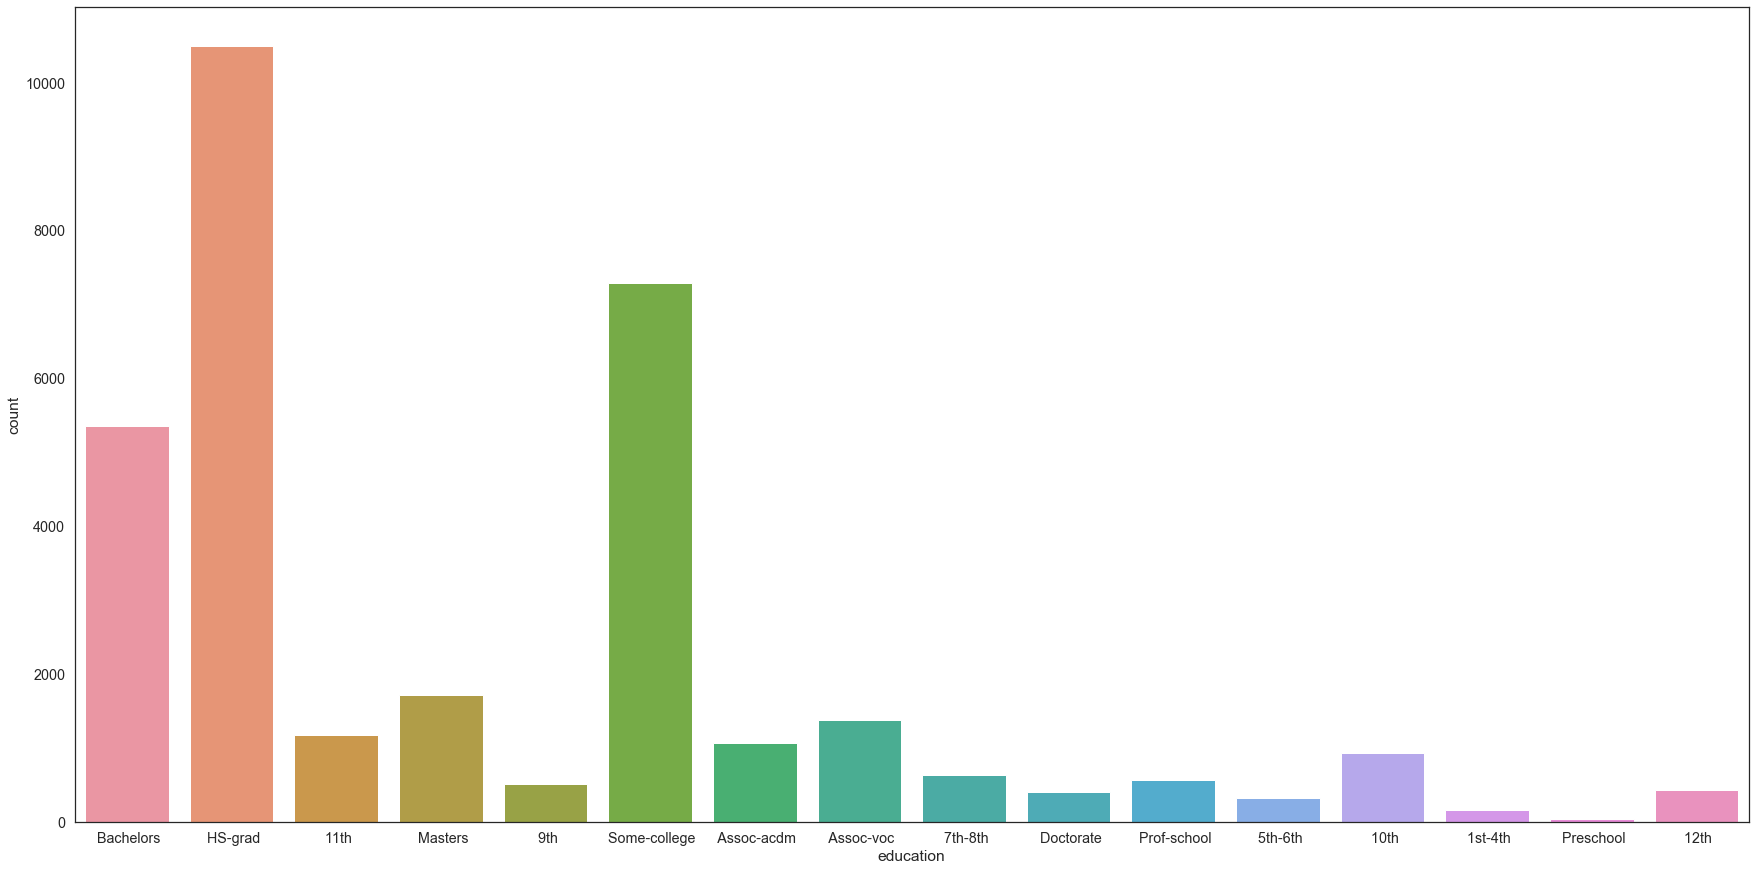

In [326]:
sns.countplot(x='education',data=df);

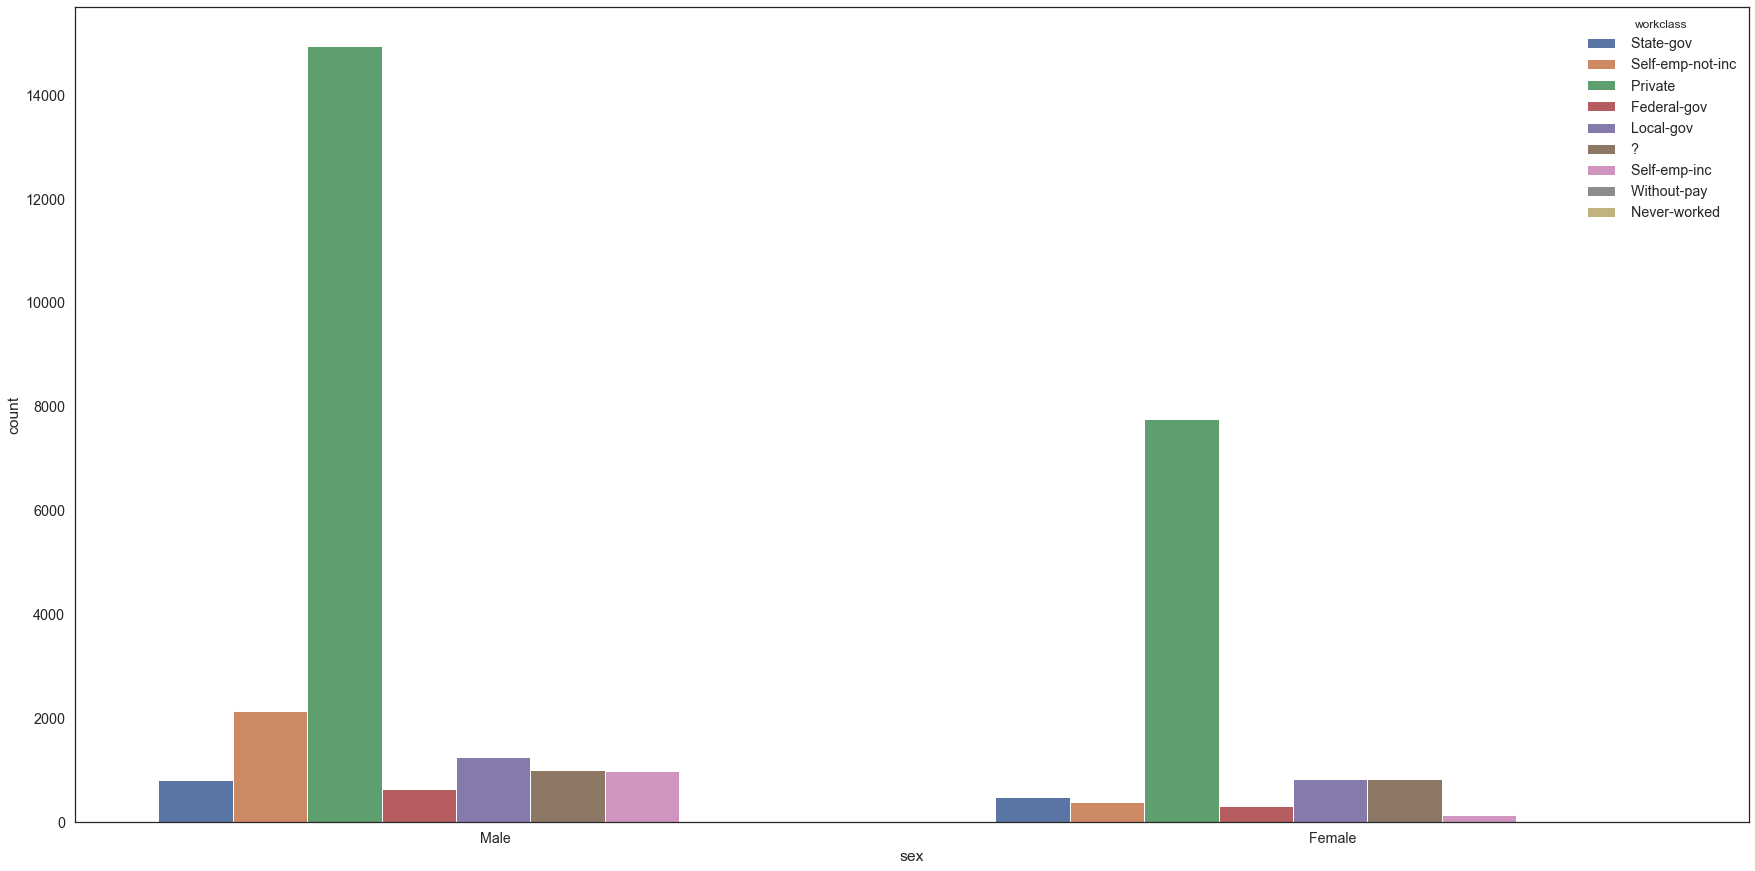

In [327]:
sns.countplot(x='sex',hue= df['workclass'],data=df);
#most of males workclass is private, so if you are male and your workclass is private you're propably to gain >50

In [328]:
df[['workclass', 'age']].groupby(['workclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,workclass,age
8,Without-pay,47.785714
5,Self-emp-inc,46.017025
6,Self-emp-not-inc,44.969697
1,Federal-gov,42.590625
2,Local-gov,41.751075
0,?,40.960240
7,State-gov,39.436055
4,Private,36.797585
3,Never-worked,20.571429


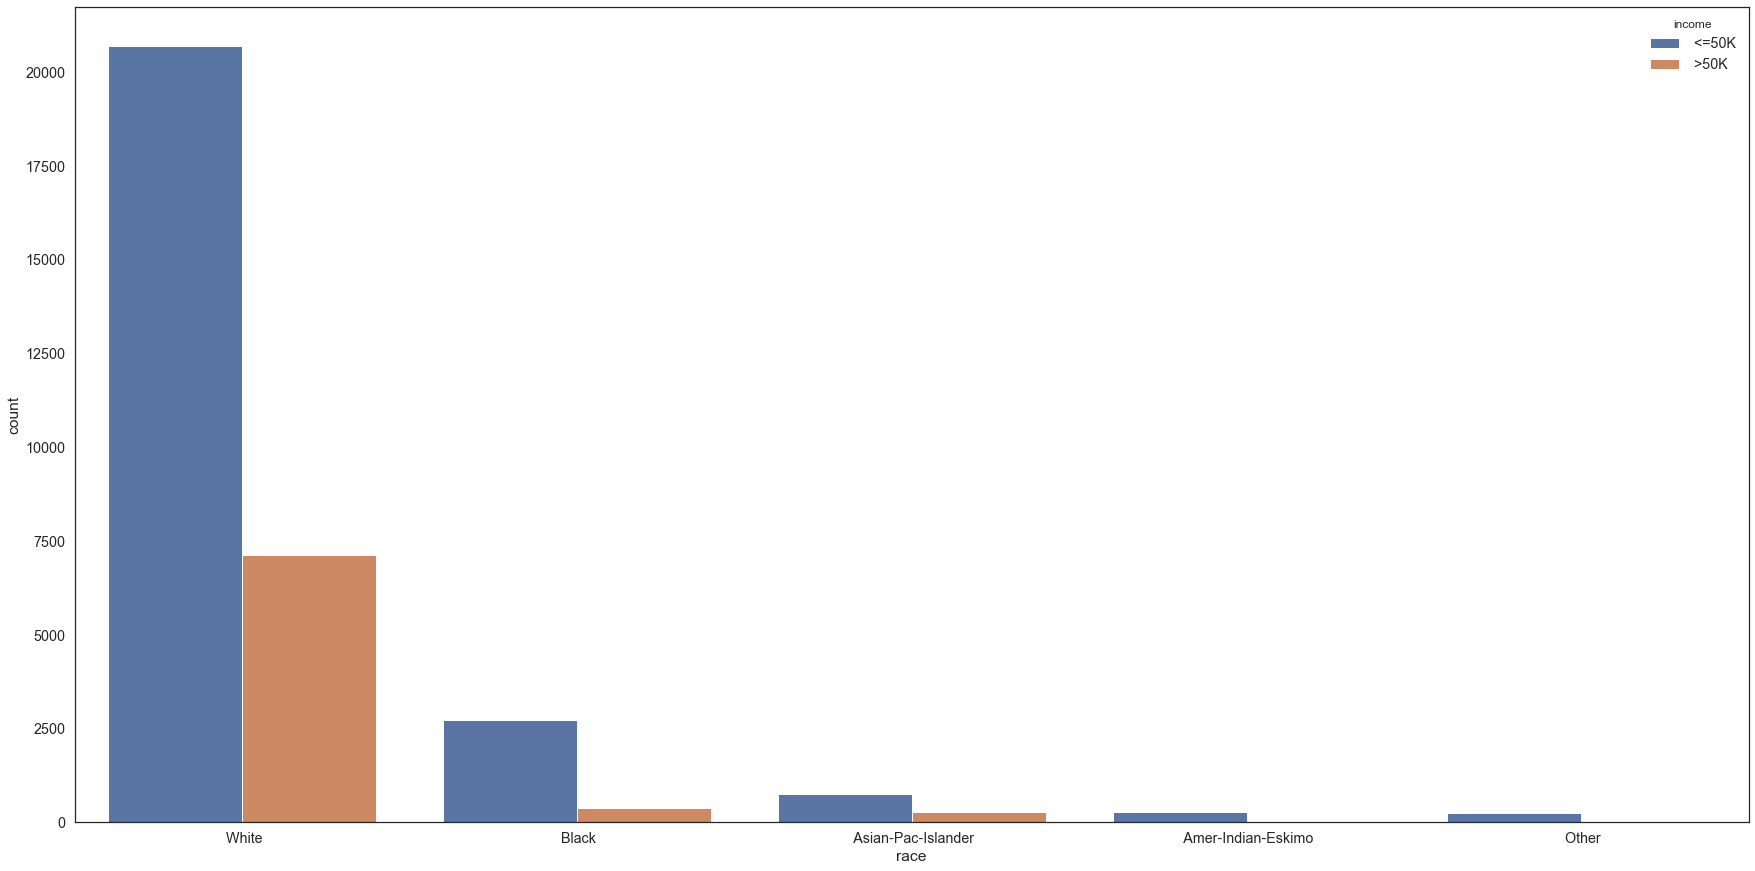

In [329]:
sns.countplot(x='race',hue= df['income'],data=df)
#white people has the biggest income

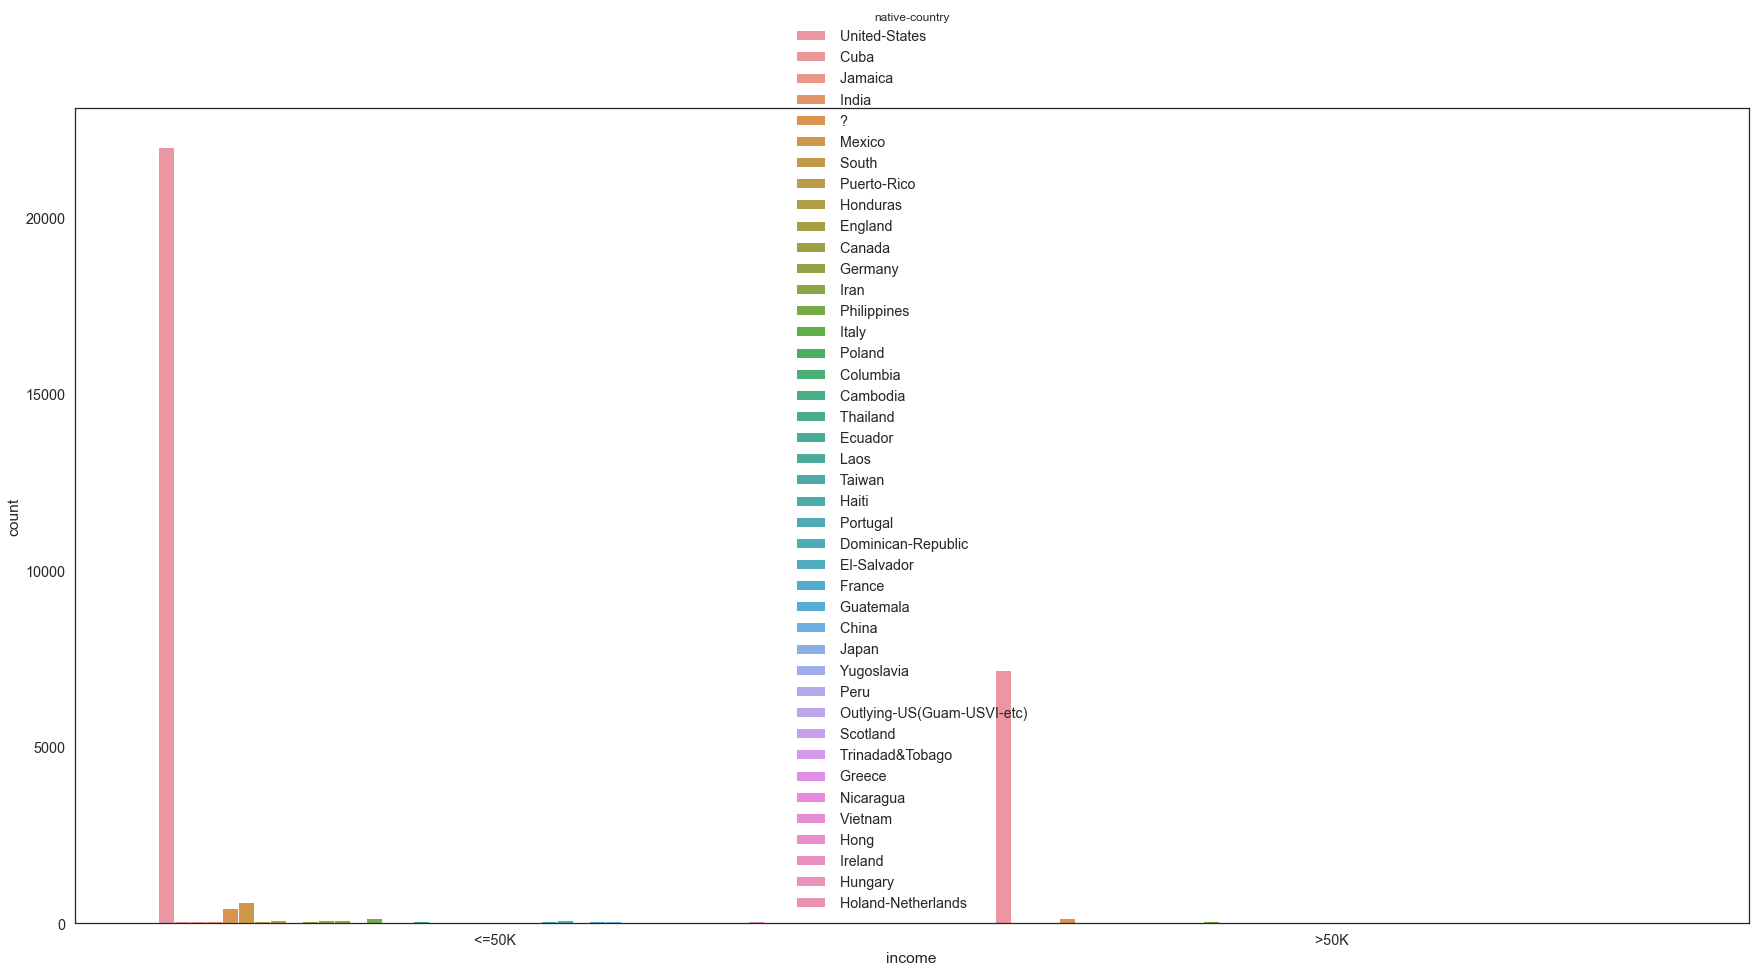

In [330]:
sns.countplot(x='income',hue= df['native-country'],data=df);
#income in united state is the largest

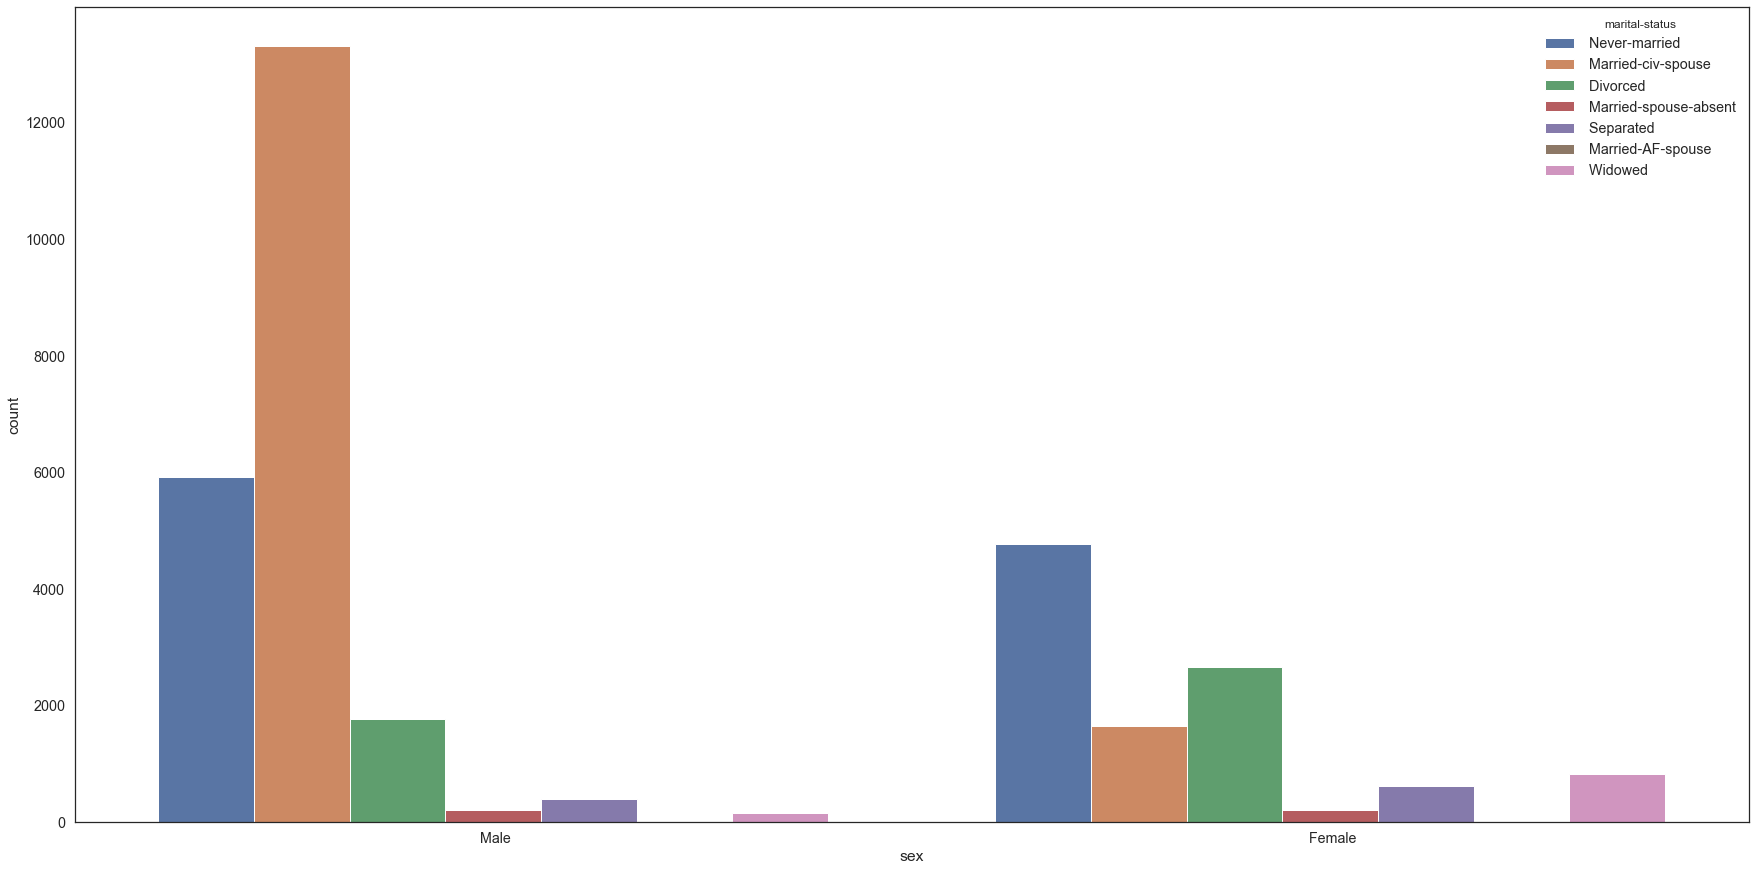

In [331]:
sns.countplot(x='sex',hue= df['marital-status'],data=df);
#men with Married-civ-spouse marital-status are likely to gain a higher income

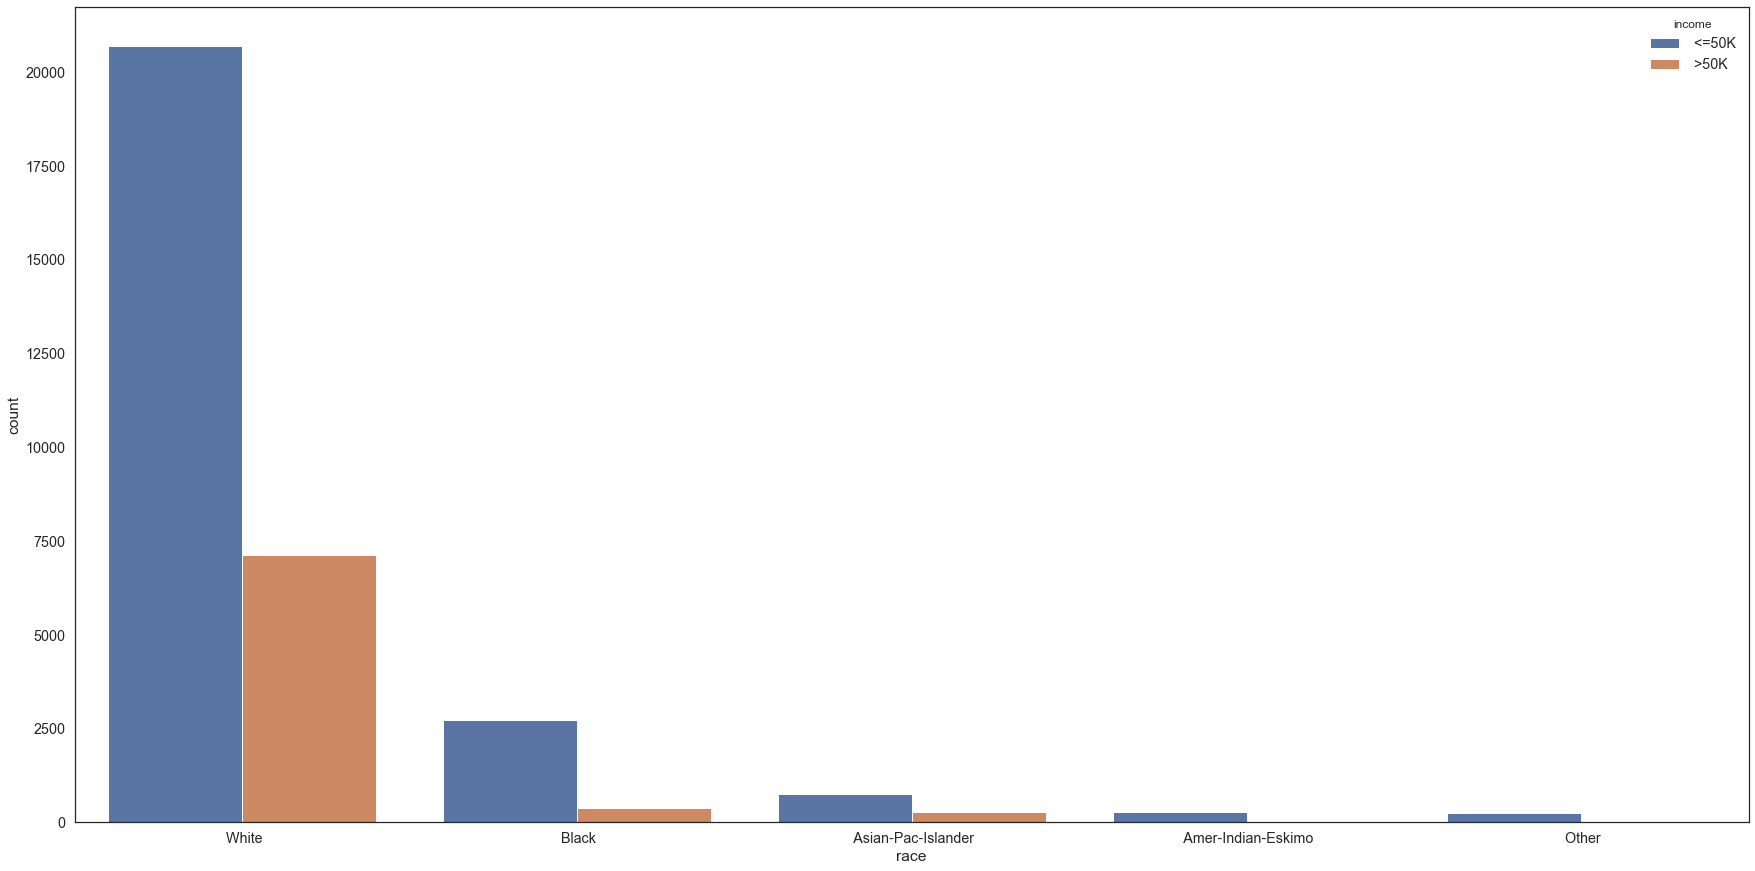

In [332]:
sns.countplot(x='race',hue= df['income'],data=df)
#white people has the biggest income

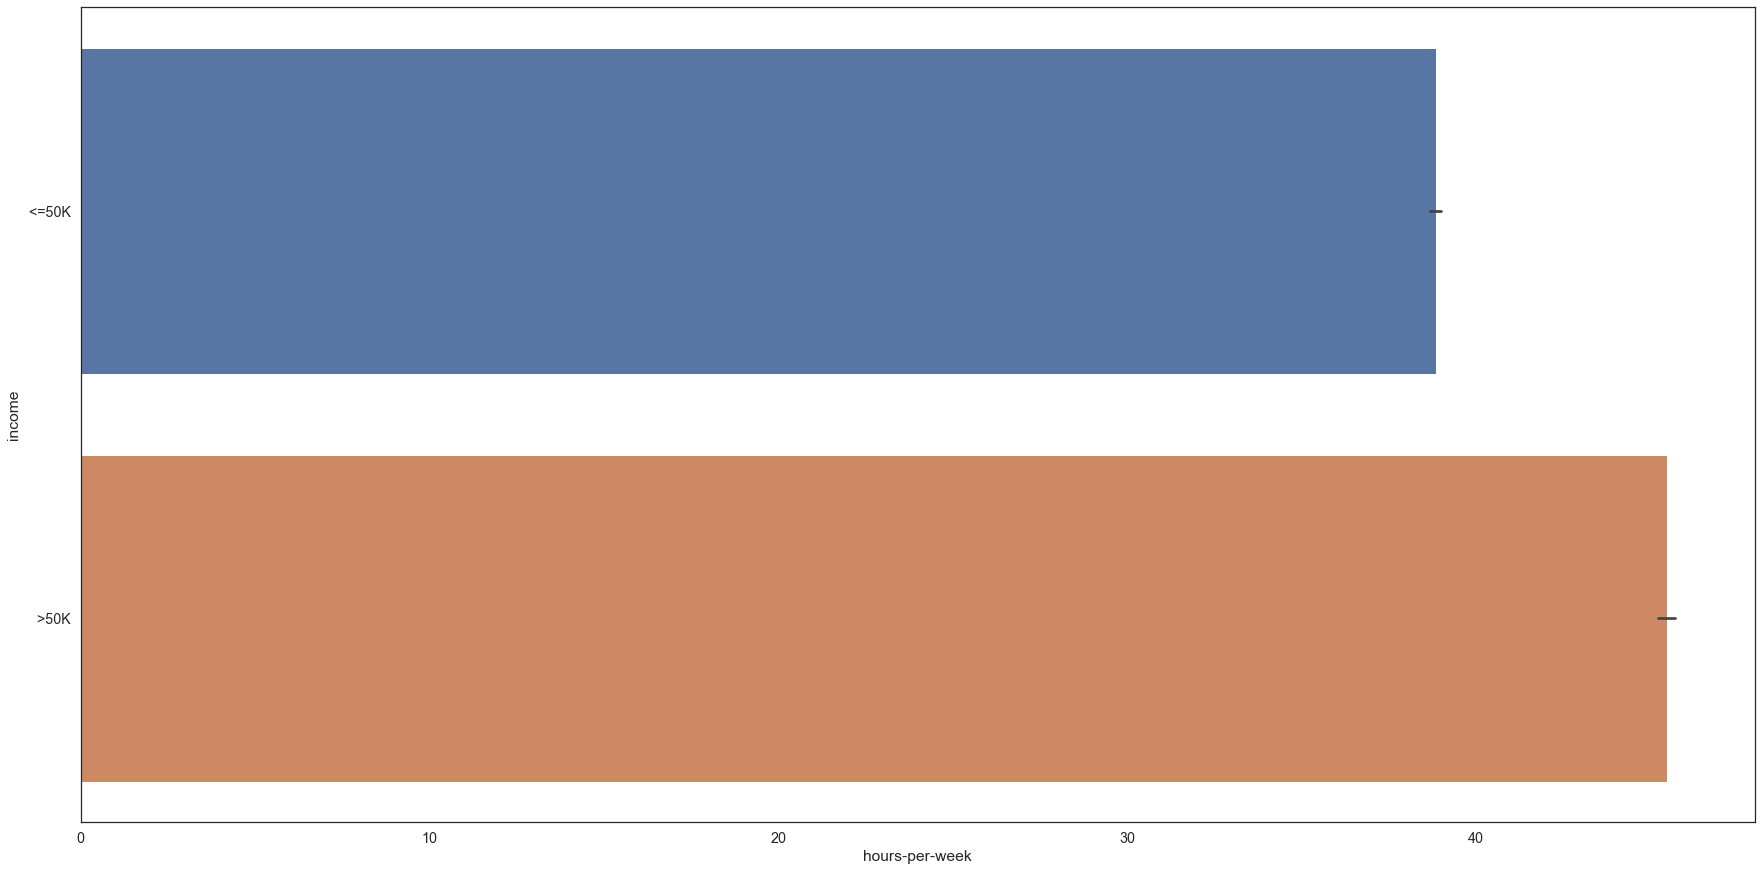

In [333]:
#sns.countplot(x='hours-per-week',hue= df['income'],data=df)
sns.barplot(x='hours-per-week',y='income',data=df)
# your housrs per week does not matter

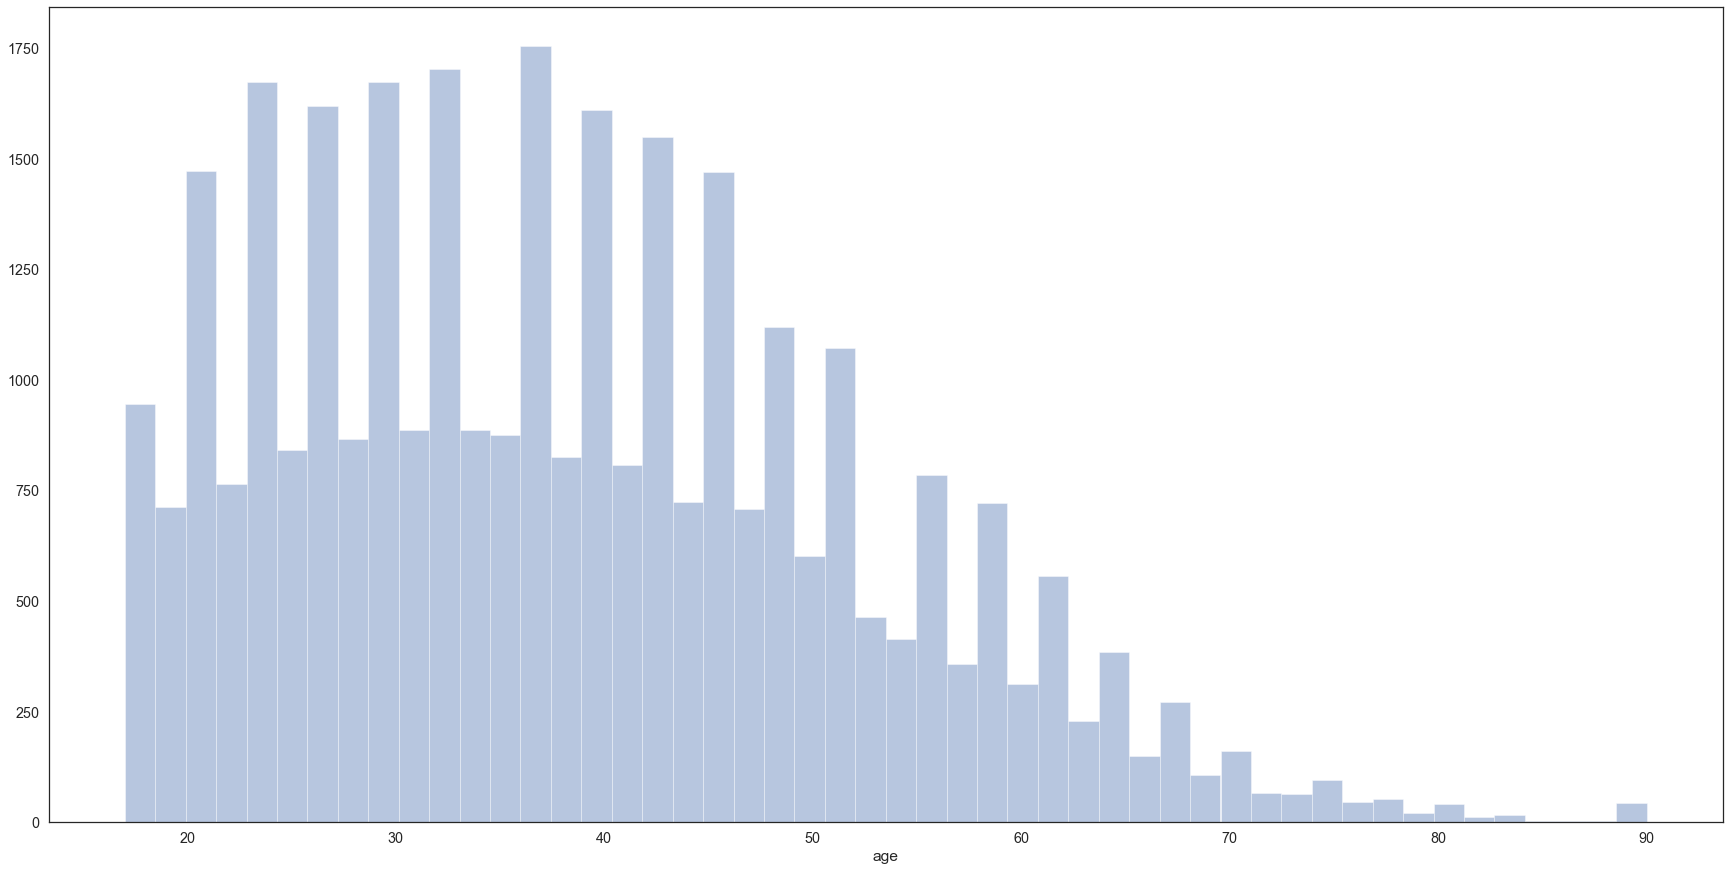

In [334]:
sns.distplot(df['age'], kde=False);
#Right skwnes of data

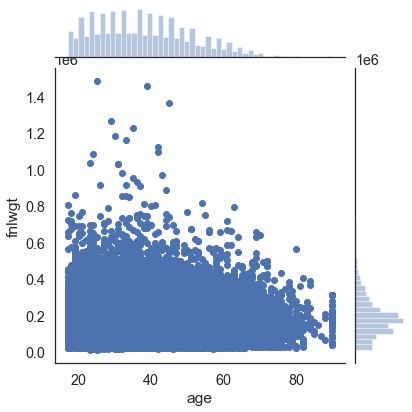

In [335]:
sns.jointplot(data=df, x='age', y='fnlwgt');

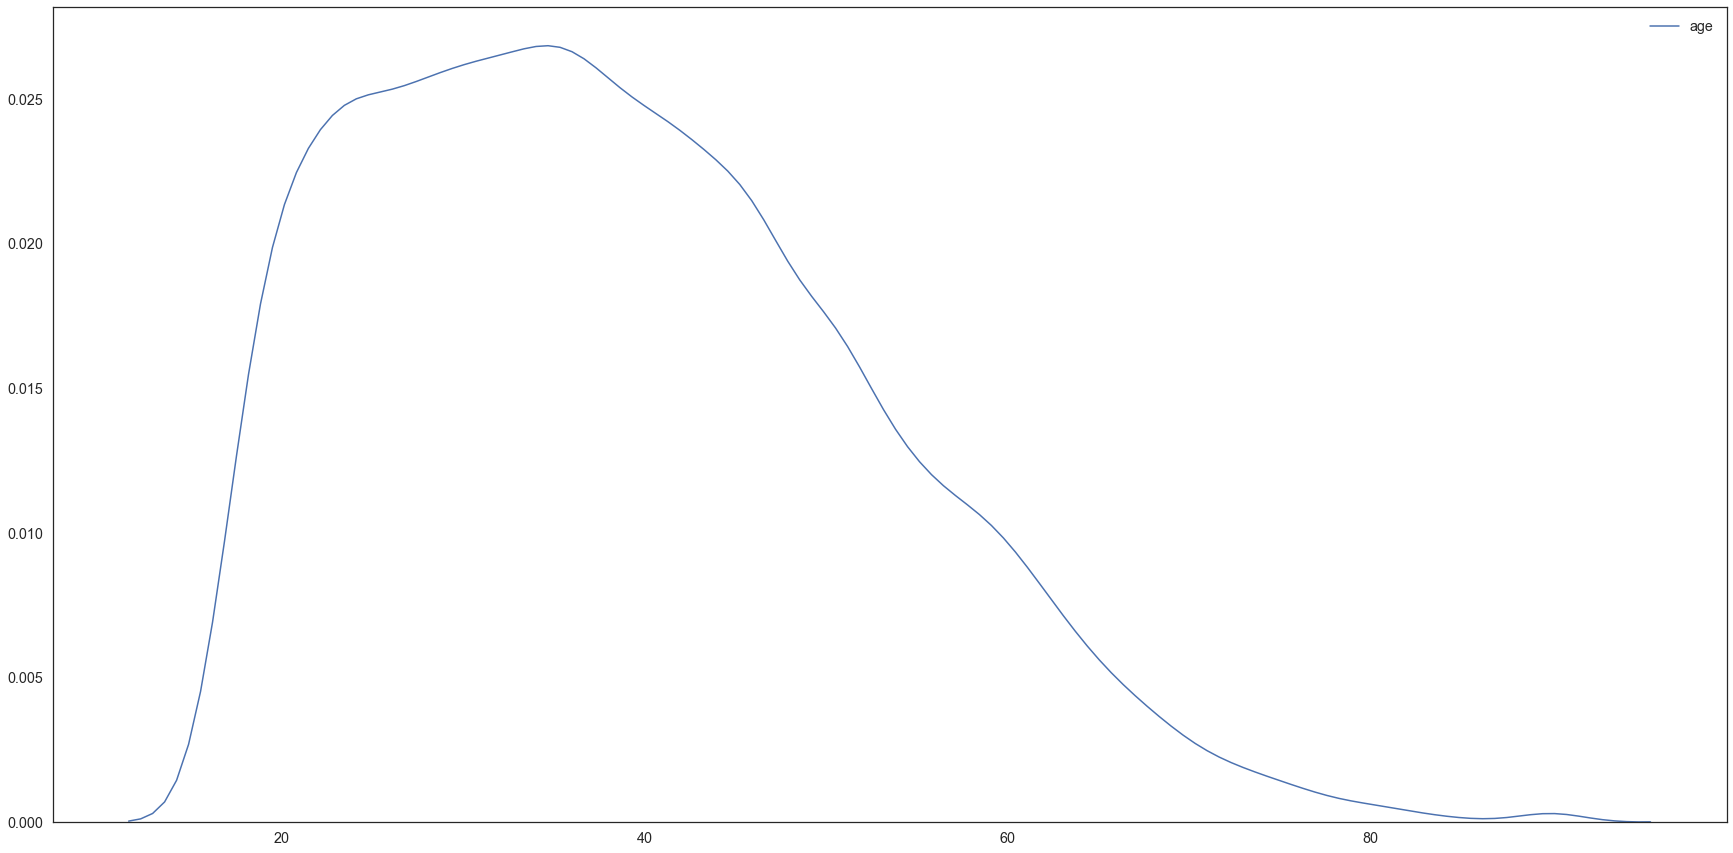

In [336]:
sns.kdeplot(df["age"])
#people between age 20-40 has the largest income, right kwnes

In [337]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


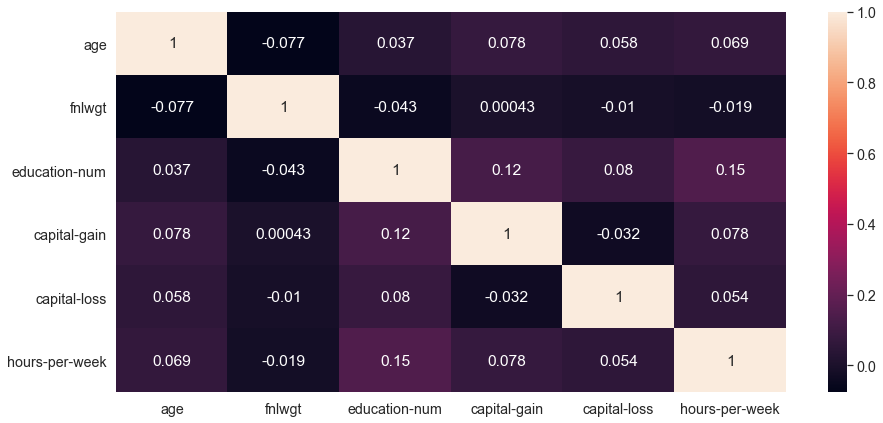

In [338]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
#nativa-country, education,race, workclass , and occupation have a strong postivite correlation witn income

In [339]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Normlization

In [341]:
for i in df.columns:
    if df[i].dtype=='object':
        lb=LabelEncoder()
        df[i]=lb.fit_transform(df[i])

In [342]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


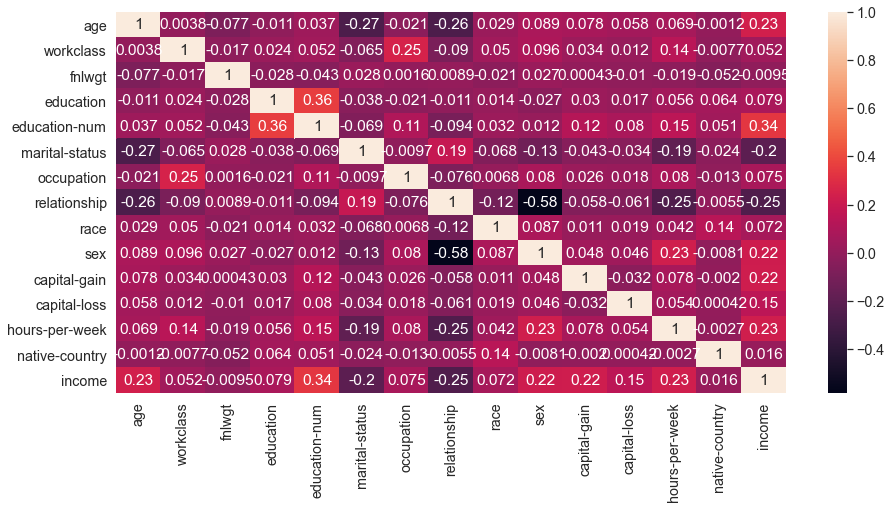

In [343]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [344]:
target = 'income'
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

In [345]:
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

0    24720
1     7841
Name: income, dtype: int64


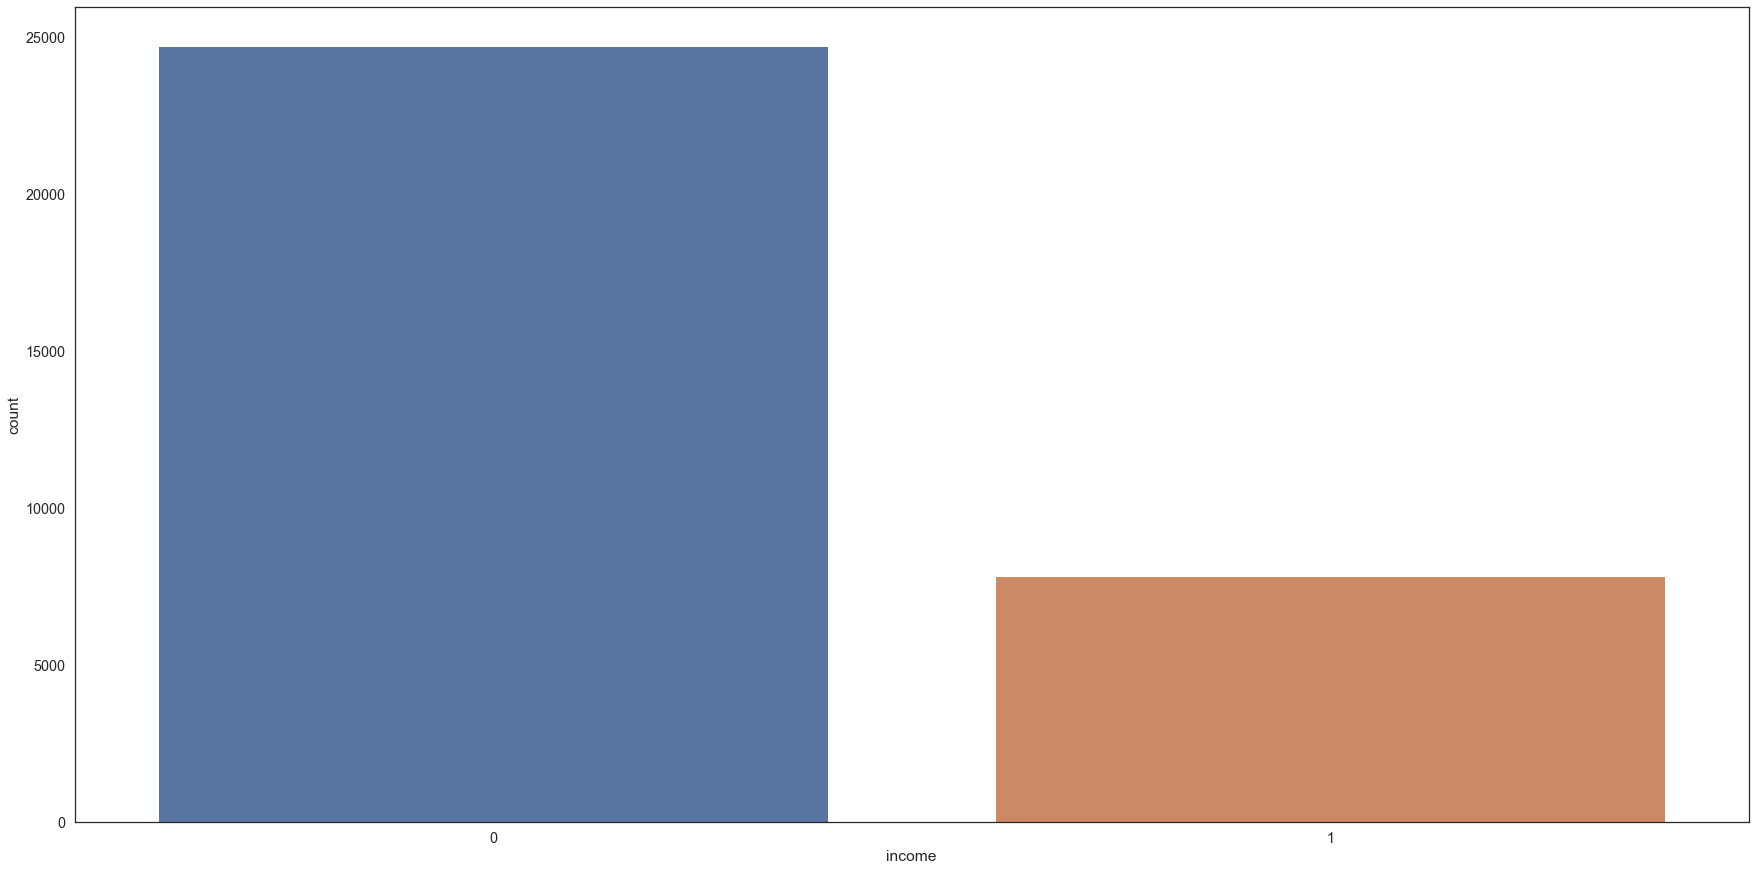

In [349]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [350]:
X_imbalanced = np.vstack((X[y == 1], X[y == 0][:30]))
y_imbalanced = np.hstack((y[y == 1], y[y == 0][:30]))

In [351]:
from sklearn.utils import resample
#
# Create oversampled training data set for minority class
#
X_oversampled, y_oversampled = resample(X_imbalanced[y_imbalanced == 0], 
                                        y_imbalanced[y_imbalanced == 0],
                                        replace=True,
                                        n_samples=X_imbalanced[y_imbalanced == 1].shape[0],
                                        random_state=123)
#
# Append the oversampled minority class to training data and related labels
#
X_balanced = np.vstack((X[y == 1], X_oversampled))
y_balanced = np.hstack((y[y == 1], y_oversampled))

In [355]:
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=.30,stratify=y_balanced)

In [356]:
100* (7841/float(df.shape[0]))

24.080955744602438

In [357]:
100* (24720/float(df.shape[0]))

75.91904425539757

In [360]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [361]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [362]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [363]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [364]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

C:\Users\maali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [365]:
f1_score(y_test,lr_pred)

0.7729765299407764

In [366]:
lr.score(X_test,y_test)

0.7800212539851222

In [367]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 2160x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ccd2354b80>)

<Figure size 360x360 with 0 Axes>

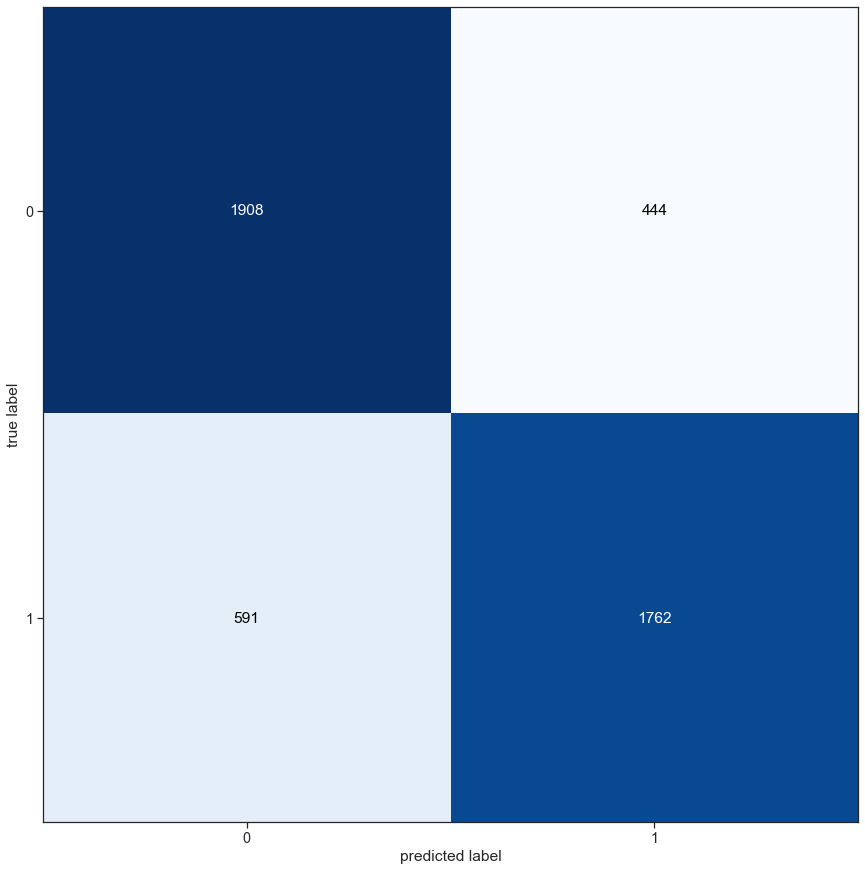

In [368]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(confusion_matrix(y_test,lr_pred))


In [369]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [370]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

(<Figure size 2160x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ccd235c940>)

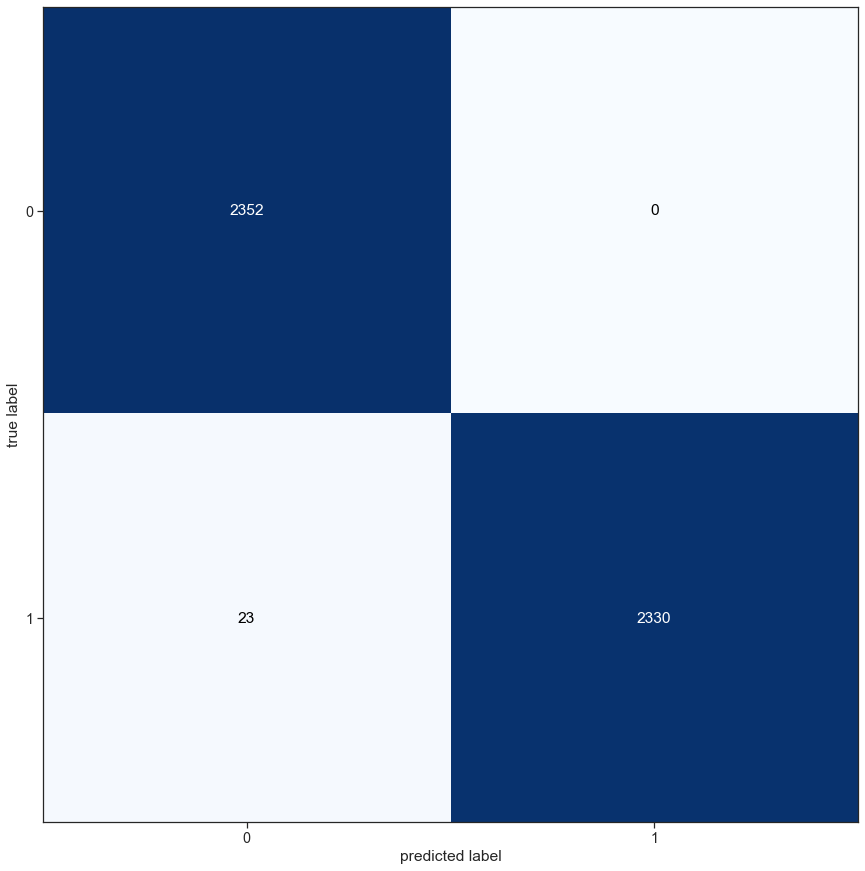

In [371]:
plot_confusion_matrix(confusion_matrix(y_test,dt_pred))

In [372]:
def generate_model_report(y_test, lr_pred):
    print("Accuracy = " , accuracy_score(y_test, lr_pred))
    print("Precision = " ,precision_score(y_test, lr_pred))
    print("Recall = " ,recall_score(y_test,lr_pred))
    print("F1 Score = " ,f1_score(y_test, lr_pred))
    pass

In [373]:
generate_model_report(y_test, lr_pred)

Accuracy =  0.7800212539851222
Precision =  0.7987307343608341
Recall =  0.7488312792180195
F1 Score =  0.7729765299407764


KNearest

In [374]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [375]:
y_pred = model.predict(X_test)

In [376]:
scores = []
for k in range(2, 5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [377]:
scores

[0.9948990435706695, 0.9948990435706695, 0.9906482465462274]

In [378]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac= accuracy_score(y_test, y_pred)
print('Accurancy score is:', ac)

Accurancy score is: 0.9906482465462274


In [379]:
import pickle 
open("saved_model.sav","wb")
pickle.dump(dt,save_model)